<a href="https://colab.research.google.com/github/OmotolaAI/K-Means-and-Hierarchial-Clustering./blob/main/K_means_and_Hierarchial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load Data File.**

Set Up Initial Libraries;

In [ ]:
import pandas as pd

Import Dataset;

In [ ]:
cc= pd.read_csv("/content/CC GENERAL.csv", delimiter= ",")

Show Dataset Head;

In [ ]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Find the number of missing values on each column;

In [ ]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It is evident that only two features have missing values;

1. "MINIMUM PAYMENTS"= 313 values are missing.
2. "CREDIT LIMIT" = 1 value is missing.

Replace missing values for both features;

In [ ]:
cc["CREDIT_LIMIT"].fillna(cc["CREDIT_LIMIT"].mean(), inplace=True)

In [ ]:
cc['MINIMUM_PAYMENTS'].fillna(cc['MINIMUM_PAYMENTS'].median(), inplace=True)

Verify Data;

In [ ]:
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**2. Hierarchial Clustering.**

Drop Irrelevant columns to reduce the Dataset;

In [ ]:
data=cc.drop("CUST_ID", axis=1)

Normalize and reduce the dimensions of the data;

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
  
# Normalizing the Data 
normalized_data = normalize(scaled_data) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_data = pd.DataFrame(normalized_data) 

# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

Import our clustering algorithm: Agglomerative;

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Apply Agglomerative Algorithm;

In [ ]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)

Agglomerative Labels;

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,1
2,1
3,1
4,1
...,...
8945,0
8946,0
8947,0
8948,1


**3. Plot Clusters.**

In [ ]:
import matplotlib.pyplot as plt

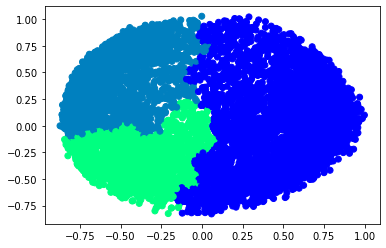

In [ ]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

**4. Dendrogram Plot.**

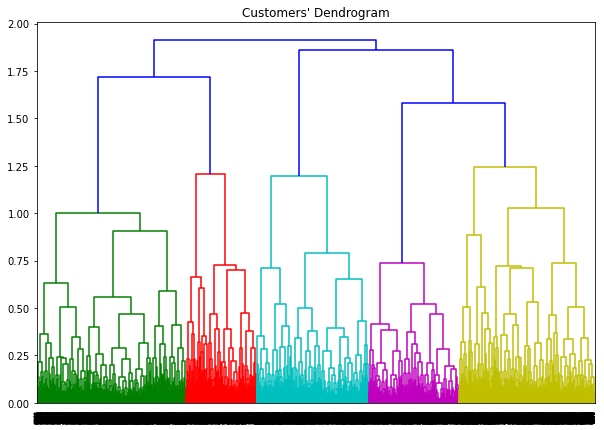

In [29]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customers' Dendrogram")
dend=shc.dendrogram(shc.linkage(X_principal, method="complete"))

**5. K-means Clustering.**

Import our clustering algorithm: K-Means;

In [30]:
from sklearn.cluster import KMeans

Apply K-Means;

In [31]:
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_principal)

KMeans(n_clusters=4, random_state=0)

K-Means Labels;

In [32]:
labels=kmeans.labels_
labels

array([2, 0, 3, ..., 1, 2, 1], dtype=int32)

In [33]:
clusters = pd.concat([data, pd.DataFrame({"cluster":labels})], axis=1)

In [34]:
pca = PCA(2)
principalComponents = pca.fit_transform(normalized_data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)
colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

(8950, 2)


In [35]:
final_data = pd.DataFrame({"x": x, "y":y, "label":labels})
groups = final_data.groupby(labels)

K-Means Centroids;

In [36]:
kmeans.predict(X_principal)
print(kmeans.cluster_centers_) 

[[-0.44251183  0.51698542]
 [ 0.41990492 -0.31828252]
 [-0.47893036 -0.29159428]
 [ 0.56729946  0.33588118]]


**6. K best vakue.**

In [37]:
sum_of_squared_distances = []
K= range (1,15)
for k in K:
    km= KMeans(n_clusters=k)
    km=km.fit(final_data)
    sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)

[13861.487631183645, 6298.351631203028, 3269.955242676867, 927.8014927847121, 790.6507899320279, 684.0017756309389, 576.8051804311974, 470.1655961324973, 426.3541619362214, 383.2847134063054, 344.61721903753073, 312.7403482336643, 285.43395955650317, 259.02624074322404]


**7. Plot Clusters.**

Elbow method;

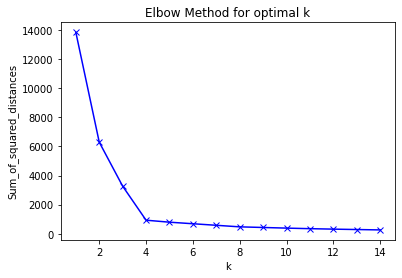

In [38]:
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method for optimal k")
plt.show()

K-Means Plot;

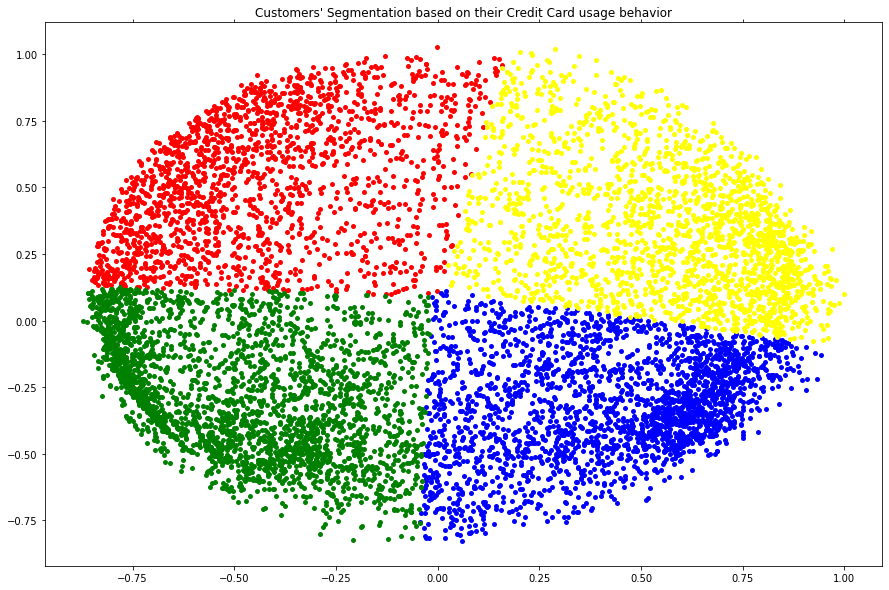

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.set_title("Customers' Segmentation based on their Credit Card usage behavior")
plt.show()

Both clustering algorithms proved effective in finding the clusters but, K-Means proved efficient in differentiating the clusters. Clusters looked rather muddled up in Hierarchial Clustering as opposed to K-Means.

The clear observations from the K-means output are as follows;

people represented in red are extravagant spenders although they have a low credit balance.

people represented in yellow are prudent spenders although they have a low credit balance.

people represented in green are reckless spenders despite their high balance.

people represented in blue are low spenders.


Other Validation Metrics;

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score


The Davis-Bouldin Index is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.

The Silhouette Coefficient is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.


For Hierarchical Clustering;


In [41]:
print(f'Davies-Bouldin index = {davies_bouldin_score(X_principal, labels)}')
print(f'Silhouette Score = {silhouette_score(X_principal, labels)}')


Davies-Bouldin index = 0.8102046863404273
Silhouette Score = 0.4265144600697577


For K-Means;

In [42]:
print(f'Davies-Bouldin index = {davies_bouldin_score(final_data, labels)}')
print(f'Silhouette Score = {silhouette_score(final_data, labels)}')

Davies-Bouldin index = 0.4021845761949156
Silhouette Score = 0.7256938962607686


Taking the results of Davies-Bouldin index and Silhoutte Score into account, K-Means did better than Hierarchial clustering.